In [1]:
!rm -rf Eunomia
!git clone https://github.com/ouaguenouni/Eunomia
!pip install -r Eunomia/requirements.txt

Cloning into 'Eunomia'...
remote: Enumerating objects: 139, done.
remote: Counting objects: 100% (139/139), done.
remote: Compressing objects: 100% (83/83), done.
remote: Total 139 (delta 79), reused 111 (delta 51), pack-reused 0
Receiving objects: 100% (139/139), 326.76 KiB | 978.00 KiB/s, done.
Resolving deltas: 100% (79/79), done.


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from Eunomia.experiments import *

In [2]:
min_acc_prob = 0.90
dicts = load_yaml_files_from_directory("SX2/2023-11-19")
print("Found: ", len(dicts))
dicts = [i for i in dicts if i["acceptance_rate"] > min_acc_prob]
print(f"Remaining {len(dicts)} with acc.prob > {min_acc_prob}")

Found:  33
Remaining 32 with acc.prob > 0.9


In [3]:
dicts[0].keys()

dict_keys(['acceptance_rate', 'accuracy_distribution', 'k', 'kt_d', 'm', 'n', 'n_samples', 'predicted_rankings', 'sigma_p', 'sigma_w', 'time', 'w_eff', 'w_rhat', 'weights'])

In [18]:
ratios = []
kts = []
accs = []
for d in dicts:
    print("==========")
    print(f"n = {d['n']}, m = {d['m']}, ratio = {np.log2(d['m'])/d['n']}")
    print("Acc Mean: ", np.array(d["accuracy_distribution"]).mean())
    print("KT mean: ", np.array(d["kt_d"]).mean())
    ratios.append(np.log2(d['m'])/d['n'])
    kts.append(np.array(d["kt_d"]).mean())
    accs.append(np.array(d["accuracy_distribution"]).mean())
    #plt.show()

paired = sorted(zip(ratios, accs, kts))
ratios, accs, kts = zip(*paired)
ratios = list(ratios)
accs = list(accs)
kts = list(kts)


n = 8, m = 16, ratio = 0.5
Acc Mean:  0.9853722288608551
KT mean:  12.442
n = 6, m = 16, ratio = 0.6666666666666666
Acc Mean:  0.9840611159801483
KT mean:  3.4426666666666668
n = 10, m = 16, ratio = 0.4
Acc Mean:  0.983955560763677
KT mean:  22.479333333333333
n = 10, m = 128, ratio = 0.7
Acc Mean:  0.9995182090997696
KT mean:  0.0
n = 10, m = 64, ratio = 0.6
Acc Mean:  0.9980797028541565
KT mean:  5.506
n = 10, m = 8, ratio = 0.3
Acc Mean:  0.9521428574323654
KT mean:  21.367333333333335
n = 6, m = 8, ratio = 0.5
Acc Mean:  0.9472380953629812
KT mean:  7.856
n = 9, m = 128, ratio = 0.7777777777777778
Acc Mean:  0.9991637913386027
KT mean:  0.0
n = 6, m = 32, ratio = 0.8333333333333334
Acc Mean:  0.9944556504487991
KT mean:  0.0
n = 10, m = 4, ratio = 0.2
Acc Mean:  0.7813333314458529
KT mean:  23.156666666666666
n = 10, m = 32, ratio = 0.5
Acc Mean:  0.9949946284294129
KT mean:  18.912666666666667
n = 7, m = 64, ratio = 0.8571428571428571
Acc Mean:  0.9976742813587188
KT mean:  1.044


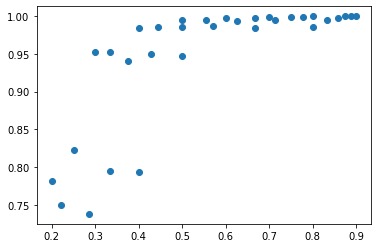

In [25]:
plt.scatter(ratios, accs)
plt.savefig("figs/acc_evolution.png")

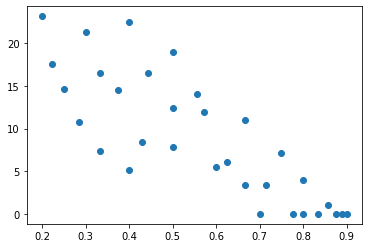

In [26]:
plt.scatter(ratios, kts)
plt.savefig("figs/kt_evolution.png")